In [121]:
import numpy as np

def convert_to_local_system(utm_points, origin_point, angle_rad):
    # Convert list of points to numpy array for vectorized operations
    utm_array = np.array(utm_points)
    
    # Step 1: Translate all points based on the new origin
    translated_points = utm_array - origin_point
    
    # Step 2: Create rotation matrix for counter-clockwise rotation
    # Note: Adjust the angle if necessary based on the actual orientation
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)], 
                                [np.sin(angle_rad),  np.cos(angle_rad)]])
    
    # Step 3: Apply rotation to all points
    rotated_points = np.dot(translated_points, rotation_matrix)

    return rotated_points

# Define your UTM points here
utm_points = [
    [571669.830, 4925261.846],  # Point 1
    [572906.372, 4923428.598],  # Point 2 (This will be the origin)
    [574739.620, 4924665.140],  # Point 3
    [573503.079, 4926498.388]   # Point 4
]

# Define the origin of the new local system (Point 2)
origin_point = np.array([572906.372, 4923428.598])

# Calculate rotation angle based on orientation from Point 2 to Point 1
# Assuming Point 2 to Point 1 is the positive y-direction
dx = 571669.830 - 572906.372  # Change in x
dy = 4925261.846 - 4923428.598  # Change in y
angle_rad = np.arctan2(dy, dx)  # Calculate the angle in radians

# Convert points
local_points = convert_to_local_system(utm_points, origin_point, angle_rad)

# Print the local coordinates
for i, point in enumerate(local_points, 1):
    print(f"Point {i} in local coordinates: {point}")


Point 1 in local coordinates: [ 2.21129698e+03 -4.54747351e-13]
Point 2 in local coordinates: [0. 0.]
Point 3 in local coordinates: [-6.78255674e-10 -2.21129698e+03]
Point 4 in local coordinates: [ 2211.29642386 -2211.29781209]


In [122]:
import numpy as np

def convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle):
    utm_array = np.array(utm_points)
    translated_points = utm_array - origin_point
    
    # Calculate the necessary rotation to align the axes
    # Ensure that the Easting direction is aligned along the x-axis and Northing along y-axis
    rotation_angle = easting_angle - np.pi/2  # Aligning Easting to x-axis

    rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)], 
                                [np.sin(rotation_angle),  np.cos(rotation_angle)]])
    
    rotated_points = np.dot(translated_points, rotation_matrix)
    
    return rotated_points

# Define your UTM points here
utm_points = [
    [571669.830, 4925261.846],  # Point 1
    [572906.372, 4923428.598],  # Point 2 (This will be the origin)
    [574739.620, 4924665.140],  # Point 3
    [573503.079, 4926498.388]   # Point 4
]

# Define the origin of the new local system (Point 2)
origin_point = np.array([572906.372, 4923428.598])

# Calculate rotation angles for the Northing and Easting directions
# Northing (Point 2 to Point 1)
dx_northing = 571669.830 - 572906.372
dy_northing = 4925261.846 - 4923428.598
northing_angle = np.arctan2(dy_northing, dx_northing)

# Easting (Point 2 to Point 3)
dx_easting = 574739.620 - 572906.372
dy_easting = 4924665.140 - 4923428.598
easting_angle = np.arctan2(dy_easting, dx_easting) +np.pi/2

# Convert points
local_points = convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle)

# Print the local coordinates
for i, point in enumerate(local_points, 1):
    print(f"Point {i} in local coordinates: {point}")


Point 1 in local coordinates: [-6.78028300e-10  2.21129698e+03]
Point 2 in local coordinates: [0. 0.]
Point 3 in local coordinates: [2.21129698e+03 2.27373675e-13]
Point 4 in local coordinates: [2211.29781209 2211.29642386]


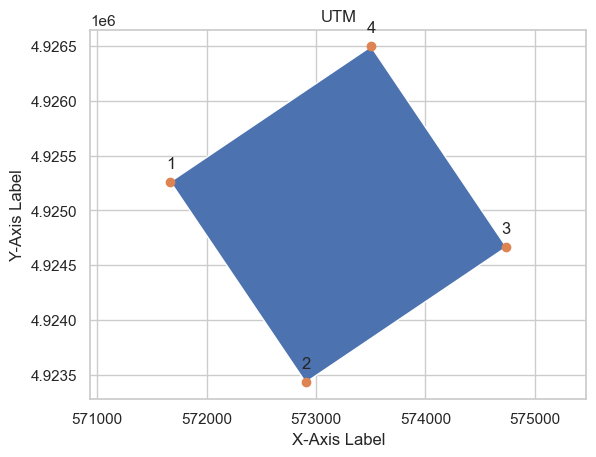

In [123]:
import matplotlib.pyplot as plt

xs = [n[0] for n in utm_points]
ys = [n[1] for n in utm_points]
labels = ['1', '2', '3', '4']

plt.fill(xs, ys)
plt.scatter(xs, ys)
plt.axis('equal')  # Set equal aspect ratio for x and y axes

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label, (xs[i], ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')


plt.title('UTM')
plt.show()


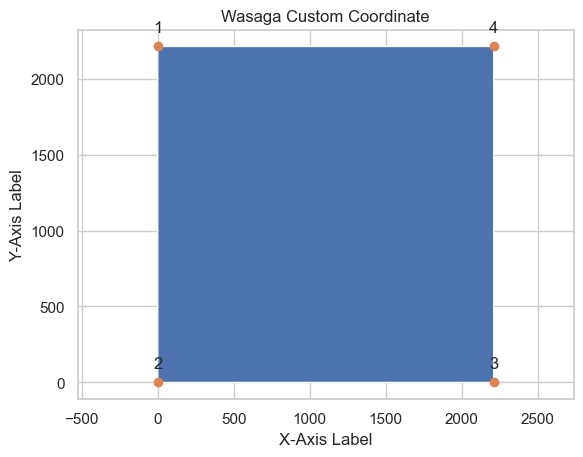

In [124]:
import matplotlib.pyplot as plt

xs = [n[0] for n in local_points]
ys = [n[1] for n in local_points]
labels = ['1', '2', '3', '4']

plt.fill(xs, ys)
plt.scatter(xs, ys)
plt.axis('equal')  # Set equal aspect ratio for x and y axes

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each point
for i, label in enumerate(labels):
    plt.annotate(label, (xs[i], ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')


plt.title('Wasaga Custom Coordinate')
plt.show()


In [125]:
import numpy as np
import pandas as pd


In [126]:
# Read CSV data
df = pd.read_csv("septics_coordinates.csv")  # Ensure the file path is correct

# Extract UTM coordinates
utm_points = df[['UTM Easting', 'UTM Northing']].values

# Define the origin of the Wasaga Coordinate System (presumably Point 2)
origin_point = np.array([572906.372, 4923428.598])  # Replace with actual origin coordinates

# Define angles for the Wasaga Coordinate System based on Point 1 and Point 3's UTM coordinates
# [Use the previously calculated angles or recalculate if necessary]

# Convert UTM coordinates to Wasaga Coordinates
wasaga_points = convert_to_local_system(utm_points, origin_point, northing_angle, easting_angle)

# Add the converted coordinates back to the dataframe
df['Wasaga Easting'] = wasaga_points[:, 0]
df['Wasaga Northing'] = wasaga_points[:, 1]

# Print or save the updated dataframe
print(df.head())  # or df.to_csv('converted_coordinates.csv', index=False)


                 Name    UTM Easting  UTM Northing  Year  Wasaga Easting  \
0  Untitled Placemark  572149.205330  4.924782e+06  1978      129.054694   
1  Untitled Placemark  572247.092236  4.924821e+06  1978      232.190267   
2  Untitled Placemark  572200.562035  4.924800e+06  1978      182.001705   
3  Untitled Placemark  572164.930419  4.924788e+06  1978      145.645655   
4  Untitled Placemark  572131.084305  4.924774e+06  1978      109.518697   

   Wasaga Northing  
0      1545.365732  
1      1523.220153  
2      1532.022130  
3      1541.841795  
4      1548.808106  


### plot

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Handle NaNs in 'Year'
df['Year'].fillna(0, inplace=True)  # Assuming 0 for unknown years

# Generate colors based on 'Year'
years = df['Year']
colors = plt.cm.viridis((years - years.min()) / (years.max() - years.min()))


C:\Users\swan47\AppData\Local\Temp\ipykernel_9304\776970948.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Year')


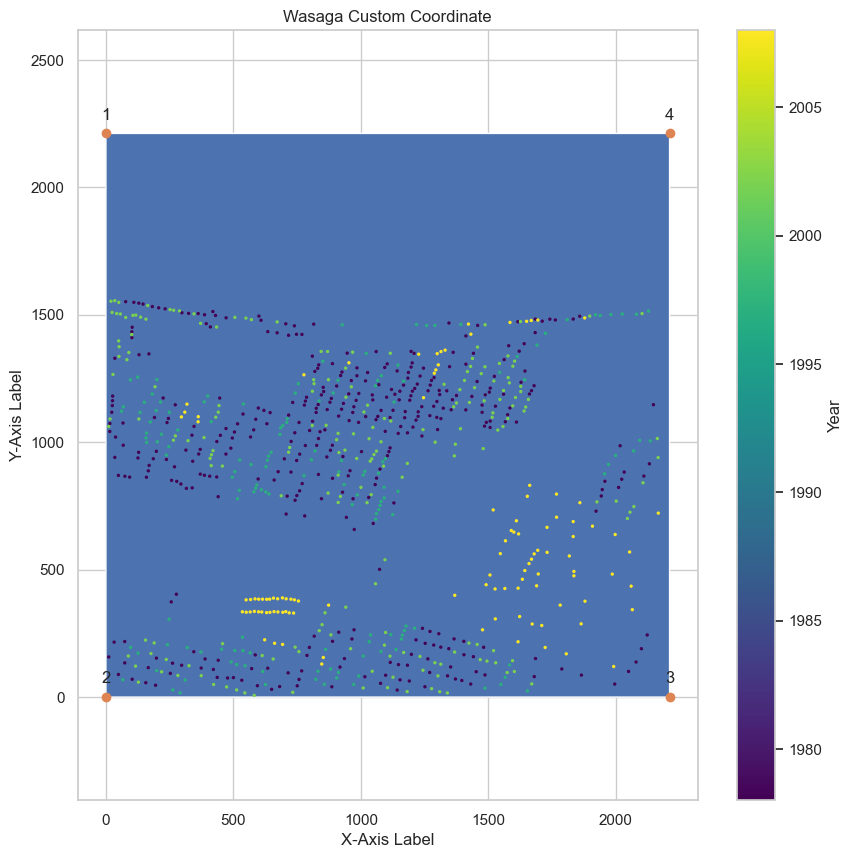

In [156]:
# Extract x and y coordinates for the model domain from 'local_points'
model_domain_xs = [n[0] for n in local_points]
model_domain_ys = [n[1] for n in local_points]

# Define labels for data points within the model domain
model_domain_labels = ['1', '2', '3', '4']

# Create a filled polygon and scatter plot of the model domain
plt.fill(model_domain_xs, model_domain_ys)
plt.scatter(model_domain_xs, model_domain_ys)

# Set an equal aspect ratio for x and y axes
plt.axis('equal')

# Set labels for the X and Y axes
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')

# Add labels for each data point within the model domain with a slight offset above each point
for i, label in enumerate(model_domain_labels):
    plt.annotate(label, (model_domain_xs[i], model_domain_ys[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Extract x and y coordinates for septic points from the 'df' DataFrame
septic_xs = df['Wasaga Easting']
septic_ys = df['Wasaga Northing']

# Create a scatter plot of the septic points with varying colors based on 'Year'
plt.scatter(septic_xs, septic_ys, s=2, c=colors)

plt.gcf().set_size_inches(10, 10)
plt.title('Wasaga Custom Coordinate')

# Create a colorbar for the 'Year'
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=years.min(), vmax=years.max()))
sm._A = []  # Array of data values to map colors to
plt.colorbar(sm, label='Year')

plt.show()


# Polygons (Sanitary Sewer)

from pykml import parser
from lxml import etree
import pandas as pd


In [164]:
from pykml import parser
from shapely.geometry import Polygon
import pyproj
from pyproj import Transformer
from shapely.geometry import Point



In [165]:
def latlon_to_utm(latitude, longitude):
    # Assuming UTM Zone 17N as per your example
    transformer = Transformer.from_crs("epsg:4326", "epsg:32617", always_xy=True)
    utm_x, utm_y = transformer.transform(longitude, latitude)
    return utm_x, utm_y


In [166]:
def extract_shapely_polygons_wasaga(kml_file, origin_point, northing_angle, easting_angle):
    with open(kml_file, 'r') as f:
        doc = parser.parse(f).getroot()

    polygons_wasaga = {}

    for folder in doc.Document.Folder.Folder:
        year_range = folder.name.text
        polygons_wasaga[year_range] = []

        for placemark in folder.Placemark:
            if hasattr(placemark, 'Polygon'):
                coords = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text
                wasaga_coords = []

                for coord_str in coords.strip().split(' '):
                    lon, lat, _ = map(float, coord_str.split(','))
                    utm_x, utm_y = latlon_to_utm(lat, lon)
                    wasaga_point = convert_to_local_system([[utm_x, utm_y]], origin_point, northing_angle, easting_angle)[0]
                    wasaga_coords.append(wasaga_point)

                polygon_wasaga = Polygon(wasaga_coords)
                polygons_wasaga[year_range].append(polygon_wasaga)

    return polygons_wasaga


In [167]:
kml_file = 'Sanitary_Polygons.kml'
origin_point = np.array([572906.372, 4923428.598])  # Replace with actual origin coordinates


# Replace with actual angles
polygon_shapes_wasaga = extract_shapely_polygons_wasaga(kml_file, origin_point, northing_angle, easting_angle)

# Example: Print the Wasaga polygons for a specific year range
year_range = '2011-2015'
for poly in polygon_shapes_wasaga.get(year_range, []):
    print(poly)


POLYGON ((387.71745463150927 738.9080698084605, 460.933598398679 715.0291408916158, 504.10907576721246 817.4087386553531, 465.57427234500165 830.0820020221673, 426.06690112919097 820.7403594713719, 387.71745463150927 738.9080698084605))
POLYGON ((820.6893392711619 -4.072910162465107, 975.1253588559237 -1.511805579502274, 1032.8573687404992 144.453490802524, 901.1570648199363 198.00023827868145, 859.5637622892637 88.9992984769186, 820.6893392711619 -4.072910162465107))
POLYGON ((950.5418632577594 1031.4746987570147, 857.9813626742142 793.0843003086429, 939.8330405151382 767.3274401122382, 1037.5860178052662 1000.6346096813041, 950.5418632577594 1031.4746987570147))


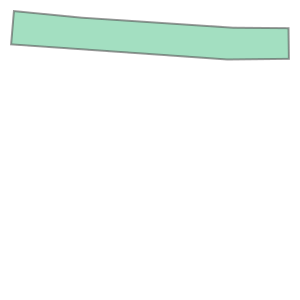

In [168]:
polygon_shapes_wasaga['2006-2010'][1]

In [169]:
def is_point_in_polygons(point, polygons_dict):
    for year_range, polygons in polygons_dict.items():
        for poly in polygons:
            if poly.contains(point):
                return True, year_range
    return False, None


In [170]:
# Create two new columns for the check result and the corresponding year range
df['In_Polygon'] = False
df['Sewer_Installation_Period'] = None

for index, row in df.iterrows():
    point = Point(row['Wasaga Easting'], row['Wasaga Northing'])
    in_polygon, year_range = is_point_in_polygons(point, polygon_shapes_wasaga)
    df.at[index, 'In_Polygon'] = in_polygon
    if in_polygon:
        df.at[index, 'Sewer_Installation_Period'] = year_range



# Extract the ending year from 'Sewer_Installation_Period' and convert to integer



In [171]:
# Replace NaN or missing values with a specific category like "Unknown"
df['Sewer_Installation_Period'].fillna('Unknown', inplace=True)


In [172]:
df['Sewer_Installation_Period'].value_counts()

Sewer_Installation_Period
2001-2005    448
1996-2000    196
2006-2010     82
1991-1995     79
2011-2015     24
Unknown        6
Name: count, dtype: int64

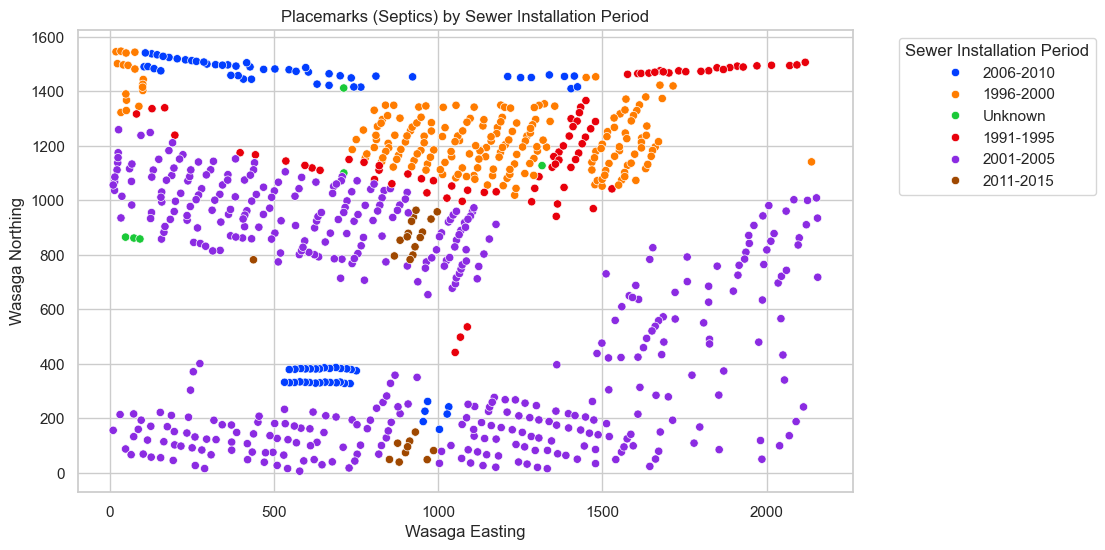

In [175]:


import seaborn as sns
# Set the style (optional)
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(x='Wasaga Easting', y='Wasaga Northing', 
                       hue='Sewer_Installation_Period', 
                       palette='bright', 
                       data=df)

# Setting plot title and labels
plt.title('Placemarks (Septics) by Sewer Installation Period')
plt.xlabel('Wasaga Easting')
plt.ylabel('Wasaga Northing')

# Adding legend
plt.legend(title='Sewer Installation Period', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()


In [176]:

def extract_year_end(year_range):
    if pd.isna(year_range) or year_range == 'Unknown':
        return np.nan  # or 0, if you prefer to represent unknowns with 0
    try:
        return int(year_range.split('-')[1])
    except (IndexError, ValueError):
        return np.nan  # or 0, for any format errors
    
df['Year End'] = df['Sewer_Installation_Period'].apply(extract_year_end)



In [178]:
# Validate

In [179]:
import os
import matplotlib.pyplot as plt
folder_name = 'Septic_Changes'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)



In [184]:
for year in range(1978, 2016, 1):  # From 1978 to 2015, every 2 years
    # Filter DataFrame
    df_filtered = df[(df['Year'] <= year) & (df['Year End'] > year)]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(df_filtered['Wasaga Easting'], df_filtered['Wasaga Northing'], s=2)
    
    plt.title(f'Active Septic in {year}')
    plt.xlabel('Wasaga Easting')
    plt.ylabel('Wasaga Northing')
    


    # Set x and y limits
    plt.xlim(0, 2200)
    plt.ylim(0, 2200)
    # Save the figure
    plt.savefig(f'{folder_name}/Active_Septic_{year}.png')
    plt.close()  # Close the figure to free up memory


# Export

In [177]:
df['Wasaga Easting'] = df['Wasaga Easting']/2211.3*2200 # normalization
df['Wasaga Northing']= df['Wasaga Northing']/2211.3*2200 # normalization

df.to_csv('septics_transformed.csv')